In [ ]:
import numpy as np
import pandas as pd

def generate_sweat_data(num_samples=1000):
    # Define the mean and standard deviation for each element.
    # We'll introduce variation to mimic real-world data and differentiate between patient and healthy.

    # Lactate (mM)
    lactate_mean_epilepsy = 2.5
    lactate_std_epilepsy = 0.8
    lactate_mean_healthy = 1.5
    lactate_std_healthy = 0.5

    # Manganese (Mn) (µM)
    mn_mean_epilepsy = 0.05
    mn_std_epilepsy = 0.02
    mn_mean_healthy = 0.02
    mn_std_healthy = 0.01

    # Copper (Cu) (µM)
    cu_mean_epilepsy = 1.2
    cu_std_epilepsy = 0.3
    cu_mean_healthy = 0.9
    cu_std_healthy = 0.2

    # Zinc (Zn) (µM)
    zn_mean_epilepsy = 0.8
    zn_std_epilepsy = 0.2
    zn_mean_healthy = 0.6
    zn_std_healthy = 0.15

    # Generate random labels (0 for healthy, 1 for epilepsy).
    labels = np.random.choice([0, 1], size=num_samples)

    # Generate random data based on labels.
    lactate = np.where(labels == 1,
                           np.random.normal(lactate_mean_epilepsy, lactate_std_epilepsy, num_samples),
                           np.random.normal(lactate_mean_healthy, lactate_std_healthy, num_samples))
    mn = np.where(labels == 1,
                           np.random.normal(mn_mean_epilepsy, mn_std_epilepsy, num_samples),
                           np.random.normal(mn_mean_healthy, mn_std_healthy, num_samples))
    cu = np.where(labels == 1,
                           np.random.normal(cu_mean_epilepsy, cu_std_epilepsy, num_samples),
                           np.random.normal(cu_mean_healthy, cu_std_healthy, num_samples))
    zn = np.where(labels == 1,
                           np.random.normal(zn_mean_epilepsy, zn_std_epilepsy, num_samples),
                           np.random.normal(zn_mean_healthy, zn_std_healthy, num_samples))

    # Create a DataFrame.
    data = pd.DataFrame({
        'Lactate (mM)': lactate,
        'Manganese (Mn) (µM)': mn,
        'Copper (Cu) (µM)': cu,
        'Zinc (Zn) (µM)': zn,
        'Epilepsy': labels
    })

    return data

# Generate the dataset.
sweat_data = generate_sweat_data(num_samples=1000)

# Print the first few rows of the dataset.
print(sweat_data.head())

# Save the dataset to a CSV file (optional).
sweat_data.to_csv('sweat_data.csv', index=False)

   Lactate (mM)  Manganese (Mn) (µM)  Copper (Cu) (µM)  Zinc (Zn) (µM)  \
0      1.184274             0.017489          0.733670        0.566825   
1      0.939180             0.022136          0.796482        0.469439   
2      3.478146             0.057749          1.127405        0.923259   
3      1.160685             0.007142          1.195663        0.543051   
4      2.472379             0.051922          1.283787        1.113057   

   Epilepsy  
0         0  
1         0  
2         1  
3         0  
4         1  


Accuracy: 0.93
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        94
           1       0.93      0.93      0.93       106

    accuracy                           0.93       200
   macro avg       0.93      0.93      0.93       200
weighted avg       0.93      0.93      0.93       200



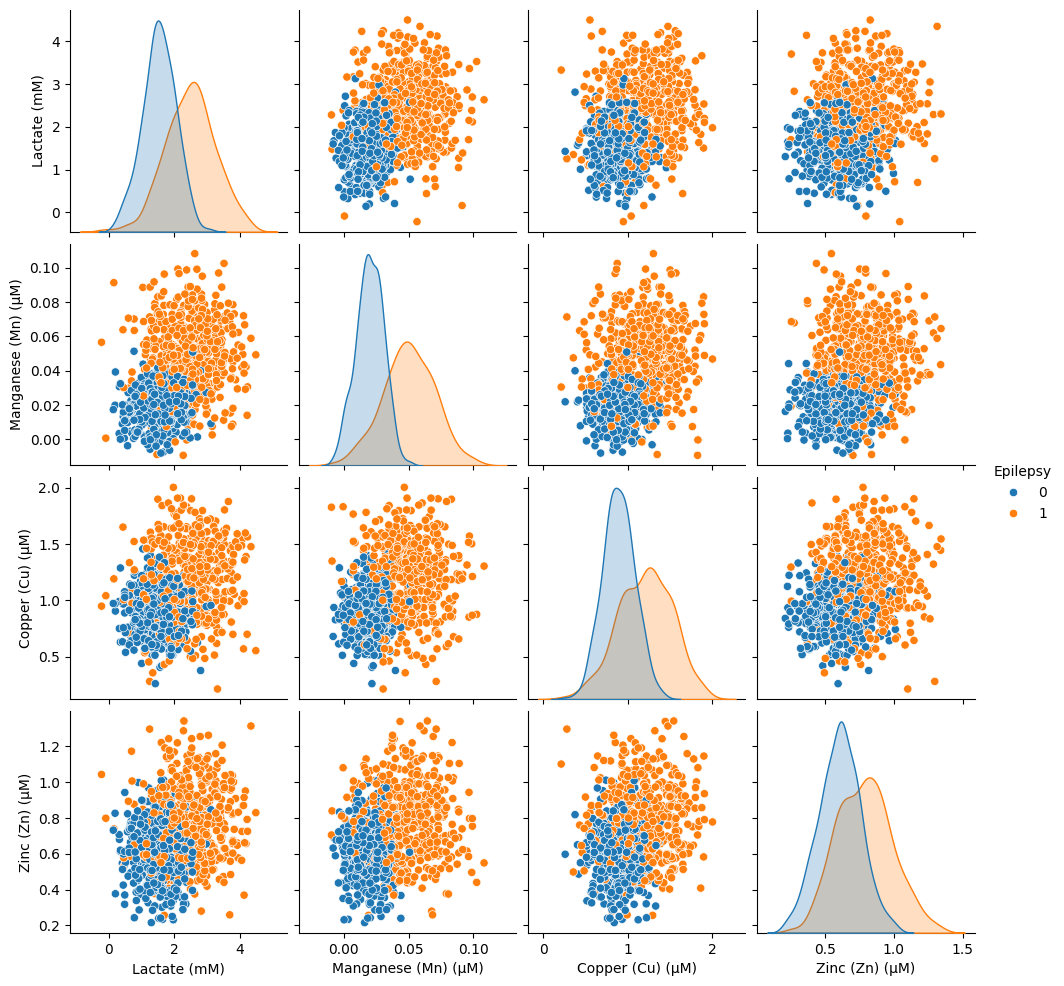

In [ ]:
!pip install seaborn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


# Assuming you have a CSV file with your sweat sample data
# If the file is not in the same directory as the script,
# you need to provide the full path to the file.
# For example:
# data = pd.read_csv('/path/to/your/file/your_data.csv')
try:
    # Since 'your_data.csv' was not provided, I'll use the 'sweat_data.csv' file we generated in the previous response
    data = pd.read_csv('sweat_data.csv')
except FileNotFoundError:
    print("Error: 'sweat_data.csv' not found. Make sure the file exists and the path is correct.")
    # You can optionally exit the script here if the file is crucial:
    # import sys
    # sys.exit(1)
    # Or provide alternative data loading logic here

# Assuming your data has columns like 'metabolite_1', 'metabolite_2', etc.,
# and a target column named 'label' representing the metabolite type.
# In this case, we'll use 'Epilepsy' as the target column
X = data.drop('Epilepsy', axis=1)
y = data['Epilepsy']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print a classification report for more detailed evaluation
print(classification_report(y_test, y_pred))

# Create a pair plot using seaborn
sns.pairplot(data, hue='Epilepsy', diag_kind='kde')  # 'hue' specifies the column for color-coding
plt.show()  # Display the plot

Accuracy: 0.93
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        94
           1       0.93      0.93      0.93       106

    accuracy                           0.93       200
   macro avg       0.93      0.93      0.93       200
weighted avg       0.93      0.93      0.93       200



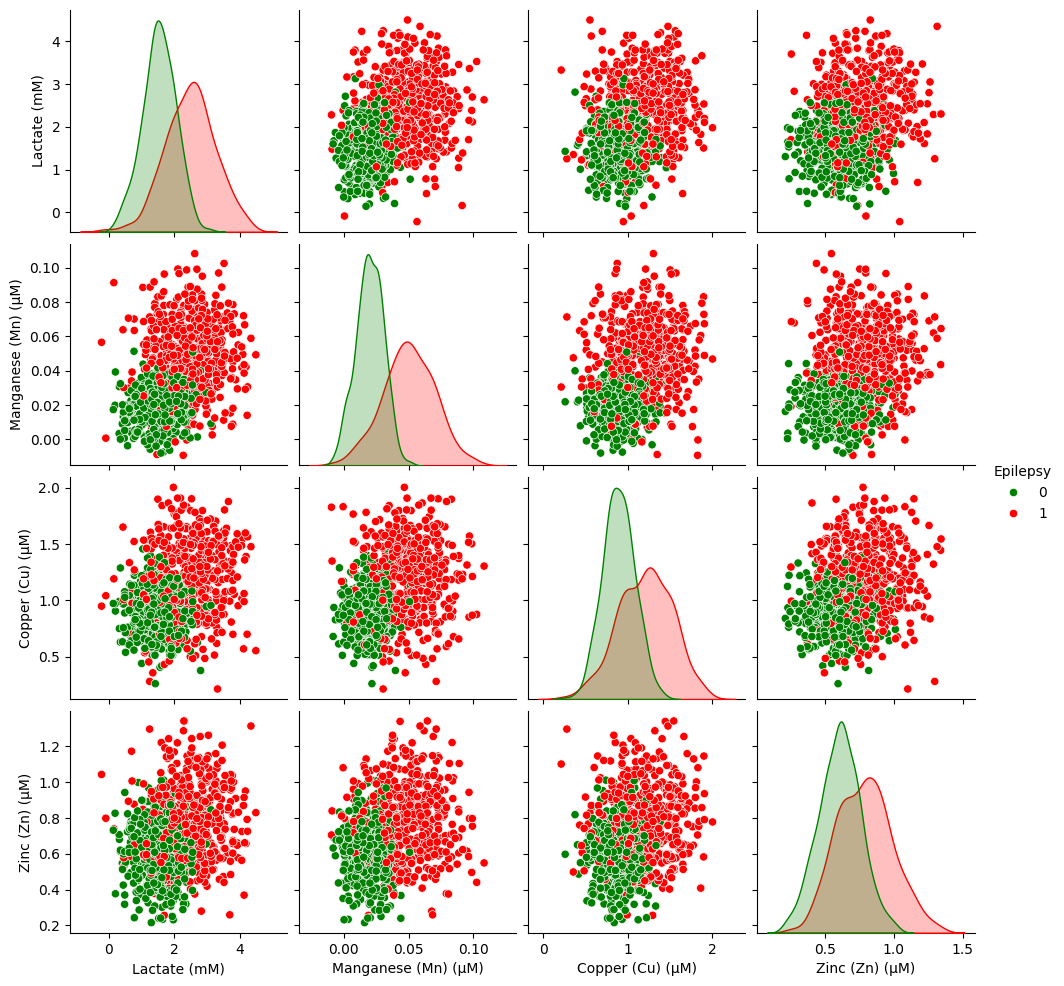

In [ ]:
!pip install seaborn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


# Assuming you have a CSV file with your sweat sample data
# If the file is not in the same directory as the script,
# you need to provide the full path to the file.
# For example:
# data = pd.read_csv('/path/to/your/file/your_data.csv')
try:
    # Since 'your_data.csv' was not provided, I'll use the 'sweat_data.csv' file we generated in the previous response
    data = pd.read_csv('sweat_data.csv')
except FileNotFoundError:
    print("Error: 'sweat_data.csv' not found. Make sure the file exists and the path is correct.")
    # You can optionally exit the script here if the file is crucial:
    # import sys
    # sys.exit(1)
    # Or provide alternative data loading logic here

# Assuming your data has columns like 'metabolite_1', 'metabolite_2', etc.,
# and a target column named 'label' representing the metabolite type.
# In this case, we'll use 'Epilepsy' as the target column
X = data.drop('Epilepsy', axis=1)
y = data['Epilepsy']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print a classification report for more detailed evaluation
print(classification_report(y_test, y_pred))

# Create a pair plot using seaborn with custom colors
sns.pairplot(data, hue='Epilepsy', diag_kind='kde', palette={0: 'green', 1: 'red'})
plt.show()